In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols = [
    "white_king_file", "white_king_rank",
    "white_rook_file", "white_rook_rank",
    "black_king_file", "black_king_rank",
    "result"
]

df = pd.read_csv("krkopt.data", header=None, names=cols)
df.head()


,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [3]:
df

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [4]:
file_map = {"a":1, "b":2, "c":3, "d":4, "e":5, "f":6,"g":7,"h":8}

for col in ["white_king_file", "white_rook_file", "black_king_file"]:
    df[col] = df[col].map(file_map)

In [5]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw


In [6]:
df["result"]

0           draw
1           draw
2           draw
3           draw
4           draw
          ...   
28051    sixteen
28052    sixteen
28053    sixteen
28054    sixteen
28055    sixteen
Name: result, Length: 28056, dtype: object

In [7]:
depth_map = {
    "draw": -1,
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "eleven": 11,
    "twelve": 12,
    "thirteen": 13,
    "fourteen": 14,
    "fifteen": 15,
    "sixteen": 16
}

df["white_depth_of_win"] = df["result"].map(depth_map)
df.head()


,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,white_depth_of_win
0,1,1,2,3,3,2,draw,-1
1,1,1,3,1,3,2,draw,-1
2,1,1,3,1,4,1,draw,-1
3,1,1,3,1,4,2,draw,-1
4,1,1,3,2,3,1,draw,-1


# Zadanie 1

In [9]:
mate_df = df[df["white_depth_of_win"] == 0].reset_index(drop = True)
draw_df = df[df["white_depth_of_win"] == -1].reset_index(drop = True)


In [10]:
mate_df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,white_depth_of_win
0,3,1,1,3,1,1,zero,0
1,3,1,1,4,1,1,zero,0
2,3,1,1,5,1,1,zero,0
3,3,1,1,6,1,1,zero,0
4,3,1,1,7,1,1,zero,0


In [11]:
draw_df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,white_depth_of_win
0,1,1,2,3,3,2,draw,-1
1,1,1,3,1,3,2,draw,-1
2,1,1,3,1,4,1,draw,-1
3,1,1,3,1,4,2,draw,-1
4,1,1,3,2,3,1,draw,-1


In [14]:
mate_counts = mate_df.groupby(["black_king_file", "black_king_rank"]).size().reset_index(name="count").sort_values(by = "count",ascending = False)

mate_counts["percent"] = round(mate_counts["count"]/mate_counts["count"].sum()*100, 2)

In [15]:
mate_counts

,black_king_file,black_king_rank,count,percent
0,1,1,12,44.44
1,1,2,5,18.52
2,3,1,5,18.52
3,4,1,5,18.52


Widać zatem, że czarny król jest najczęściej matowany, gdy znajduje się na planszy na polu (1,1). Jest wtedy matowany w ok. 44 procentach przypadków.

In [18]:
draw_counts = draw_df.groupby(["black_king_file", "black_king_rank"]).size().reset_index(name="count").sort_values(by = "count", ascending=False)


draw_counts["percent"] = round(draw_counts["count"]/draw_counts["count"].sum()*100, 2)

In [19]:
draw_counts

,black_king_file,black_king_rank,count,percent
51,7,4,80,2.86
52,7,5,80,2.86
50,7,3,80,2.86
49,7,2,80,2.86
53,7,6,80,2.86
...,...,...,...,...
1,1,2,20,0.72
8,2,1,18,0.64
7,1,8,18,0.64
16,3,1,13,0.46


Na podstawie częstości występowania widać, że czarny król nie ma jednej dominującej pozycji na której się znajduje, kiedy gra kończy się remisem. 

In [20]:
draw_counts[draw_counts["count"] == 80]["black_king_file"].unique()

array([7], dtype=int64)

In [21]:
draw_counts[draw_counts["count"] == 80]["black_king_rank"].unique()

array([4, 5, 3, 2, 6], dtype=int64)

In [22]:
draw_counts.head(15)

,black_king_file,black_king_rank,count,percent
51,7,4,80,2.86
52,7,5,80,2.86
50,7,3,80,2.86
49,7,2,80,2.86
53,7,6,80,2.86
44,6,5,77,2.75
43,6,4,74,2.65
42,6,3,72,2.58
41,6,2,72,2.58
54,7,7,68,2.43


Widać zatem, że gdy gra kończy się remisem, król czarny znajduje się najczęściej na pozycjach (7,6), (7,5), (7,4), (7,3), (7,2). W pozycjach remisowych nie występuje jedna dominująca pozycja czarnego króla. Najczęstsze pola mają bardzo zbliżone, niskie udziały procentowe, co wskazuje na równomierny rozkład położeń.

# Zadanie 2

In [28]:
df_win = df[df["white_depth_of_win"] >= 0].copy() # analizujemy tylko przypadki, w których nie ma remisu

In [29]:
wk_x = df_win["white_king_file"]
wk_y = df_win["white_king_rank"]

bk_x = df_win["black_king_file"]
bk_y = df_win["black_king_rank"]


In [31]:
df_win["dist_euclidean"] = np.sqrt(
    (wk_x - bk_x)**2 + (wk_y - bk_y)**2
)
df_win["dist_manhattan"] = (
    abs(wk_x - bk_x) + abs(wk_y - bk_y)
)
df_win["dist_chebyshev"] = np.maximum(
    abs(wk_x - bk_x),
    abs(wk_y - bk_y)
)


In [32]:
df_win[[
    "dist_euclidean",
    "dist_manhattan",
    "dist_chebyshev",
    "white_depth_of_win"
]].head()


,dist_euclidean,dist_manhattan,dist_chebyshev,white_depth_of_win
2796,2.0,2,2,0
2797,2.0,2,2,0
2798,2.0,2,2,0
2799,2.0,2,2,0
2800,2.0,2,2,0


In [33]:
df_win[[
    "dist_euclidean",
    "dist_manhattan",
    "dist_chebyshev",
    "white_depth_of_win"
]].corr()


,dist_euclidean,dist_manhattan,dist_chebyshev,white_depth_of_win
dist_euclidean,1.000000,0.963464,0.954592,0.290681
dist_manhattan,0.963464,1.000000,0.852012,0.296696
dist_chebyshev,0.954592,0.852012,1.000000,0.266009
white_depth_of_win,0.290681,0.296696,0.266009,1.000000


In [34]:
corrs = df_win[[
    "dist_euclidean",
    "dist_manhattan",
    "dist_chebyshev"
]].corrwith(df_win["white_depth_of_win"])

corrs


dist_euclidean    0.290681
dist_manhattan    0.296696
dist_chebyshev    0.266009
dtype: float64

Z powyższej analizy korelacji można zauważyć, że wszystkie trzy metryki dystansu wykazują dodatnią, jednak dość umiarkowaną zależność z liczbą ruchów do zakończenia gry. Najwyższą wartość współczynnika korelacji uzyskała metryka Manhattan, co wskazuje, że to ona najlepiej szacuje liczbę ruchów do zakończenia gry.

# Zadanie 3

In [35]:
df.head(10)

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,white_depth_of_win
0,1,1,2,3,3,2,draw,-1
1,1,1,3,1,3,2,draw,-1
2,1,1,3,1,4,1,draw,-1
3,1,1,3,1,4,2,draw,-1
4,1,1,3,2,3,1,draw,-1
5,1,1,3,2,3,3,draw,-1
6,1,1,3,2,4,1,draw,-1
7,1,1,3,2,4,2,draw,-1
8,1,1,3,2,4,3,draw,-1
9,1,1,3,3,3,2,draw,-1


In [36]:
df_win["dist_to_edge"] = np.min(np.vstack([8- bk_x, bk_x - 1, 8 - bk_y, bk_y - 1]), axis = 0)

In [37]:
df_win["dist_to_edge"].corr(df_win["white_depth_of_win"])


0.5084393404663717

Odległość czarnego króla od krawędzi planszy wskazuje umiarkowaną, dodatnią korelację z liczbą ruchów do zakończenia gry, co sugeruje, że jest to istotna informacja predykcyjna. Ma ona większy wpływ na oszacowanie liczby ruchów do zakończenia gry, niż odległość między białym, a czarnym królem.

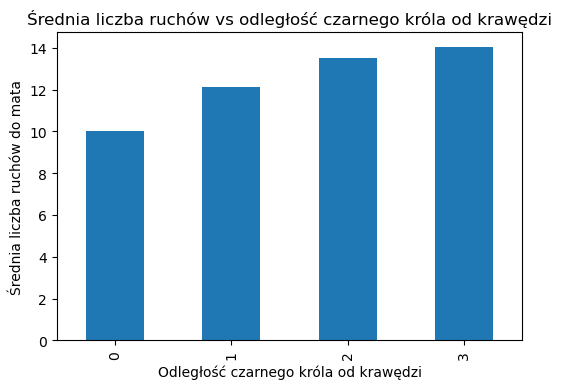

In [38]:
edge_summary = (
    df_win.groupby("dist_to_edge")["white_depth_of_win"]
    .mean()
)

edge_summary.plot(kind="bar", figsize=(6,4))
plt.xlabel("Odległość czarnego króla od krawędzi")
plt.ylabel("Średnia liczba ruchów do mata")
plt.title("Średnia liczba ruchów vs odległość czarnego króla od krawędzi")
plt.show()


Można zauważyć, że im bliżej krawędzi planszy znajduje się czarny król, tym szybciej biały gracz jest w stanie zakończyć grę matem.

In [39]:
df_win[[
    "dist_to_edge",
    "dist_manhattan",
    "white_depth_of_win"
]].corr()


,dist_to_edge,dist_manhattan,white_depth_of_win
dist_to_edge,1.000000,-0.294369,0.508439
dist_manhattan,-0.294369,1.000000,0.296696
white_depth_of_win,0.508439,0.296696,1.000000


In [40]:
df_win.groupby("dist_to_edge")["dist_manhattan"].mean()


dist_to_edge
0    6.470243
1    5.582321
2    4.805494
3    4.425926
Name: dist_manhattan, dtype: float64

Powyższa analiza wskazuje, że gdy czarny król znajduje się przy krawędzi planszy, przeciętny dystans pomiędzy królami wynosi około 6.47, natomiast w centrum planszy spada on do około 4.43. Wyjaśnia to ujemną korelację pomiędzy tymi zmiennymi i oznacza, że w pozycjach wygrywających centralne ustawienie czarnego króla wiąże się z bliższym położeniem białego króla. Można zatem stwierdzić, że uzupełnienie informacji o odległość pomiędzy białym, a czarnym królem może dodatkowo pomóc przy predykcji ilości ruchów do zakończenia gry.